In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime

/Users/bebik/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


##  Zeev
## 033363870
## Assaf
## 204249197
### setting and Downloading the tickets

In [2]:
hotels = pd.read_csv('/Users/bebik/Documents/hotels_data.csv')

In [3]:

import datetime

date_time_str = '2018/8/04'
print(hotels['Snapshot Date'][0])
#for index, row in hotels.iterrows():
tabletime = datetime.datetime.strptime( hotels['Snapshot Date'][0] , '%m/%d/%Y %H:%M')
now = datetime.datetime.strptime( date_time_str , '%Y/%m/%d')
newdt = tabletime - now
print (type(newdt))
print ( np.timedelta64(1, 'D').astype(int))


7/17/2015 0:00
<class 'datetime.timedelta'>
1


In [4]:
del hotels['Days'] #always 5
del hotels['Snapshot ID']



In [5]:
hotels.describe()

,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [6]:
hotels.describe()


,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823
std,1042.355712,983.618013,1.005191,41.575482,0.846496
min,289.000000,260.000000,1.000000,-1.000000,0.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000


In [7]:
hotels['SnapDate']= pd.to_datetime(hotels['Snapshot Date']) 
hotels['CheckingDate']= pd.to_datetime(hotels['Checkin Date']) 
hotels['weekday']= hotels['CheckingDate'].dt.dayofweek

In [8]:
hotels['DayDiff'] = hotels['CheckingDate']-hotels['SnapDate']
hotels['Discount'] = hotels['Original Price']-hotels['Discount Price']
hotels['DiscountPerc'] = hotels['Discount']/hotels['Original Price']
#hotels['delta_days']= (hotels['CheckingDate']- now).astype(int)/8.636207/10**13
hotels['delta_days']=(pd.to_datetime(hotels['Checkin Date']) - pd.to_datetime(hotels['Snapshot Date'])).dt.days


In [9]:
hotels.describe()

,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,weekday,DayDiff,Discount,DiscountPerc,delta_days
count,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848.000000,187848,187848.000000,187848.000000,187848.000000
mean,1825.742143,1673.172283,2.434186,14.588561,3.905823,2.917763,17 days 11:10:35.185894,152.569860,0.088777,17.465685
std,1042.355712,983.618013,1.005191,41.575482,0.846496,1.840536,10 days 00:57:55.438813,143.316985,0.060302,10.040225
min,289.000000,260.000000,1.000000,-1.000000,0.000000,0.000000,1 days 00:00:00,15.000000,0.005814,1.000000
25%,1160.000000,1035.000000,2.000000,-1.000000,3.000000,2.000000,9 days 00:00:00,70.000000,0.048450,9.000000
50%,1599.000000,1475.000000,2.000000,-1.000000,4.000000,3.000000,18 days 00:00:00,103.000000,0.070562,18.000000
75%,2160.000000,1963.250000,3.000000,8.000000,4.000000,4.000000,26 days 00:00:00,180.000000,0.109339,26.000000
max,29975.000000,28675.000000,4.000000,431.000000,5.000000,6.000000,34 days 00:00:00,3760.000000,0.684258,34.000000


## Createing Dendogram
1. calculating the 40 hotels with most checking information
2. add the dates of the 40 hotels to the selected dates
3. create df_df with the 40 X 40 (dates*codes) * hotel ids
4. hotel ids and names are in the hotels DataFrame

In [10]:
import numpy 
vals = numpy.unique(hotels['Hotel Name'].values)
checkins = numpy.unique(hotels['Checkin Date'].values)
hotels_num = numpy.unique(hotels['Hotel Name'].values)
print (type(hotels_num[0]))
#print(checkins,len(checkins))             
#print(hotels_num,len(hotels_num))             
numbers = []
for i in range(len(vals)) :
    numbers.append(i)
print (len(vals),len(numbers) )
hotels['hotel']=hotels['Hotel Name']
hotels['hotel'].replace(to_replace=vals, value=numbers,inplace = True)
hotels.head()

lens = []
for date in checkins:
    xdf = hotels['Checkin Date']==date
    lens.append (len(hotels[xdf]))
lens.sort()


<class 'str'>
554 554


In [11]:
print (lens[len(lens) - 41])
bar = lens[len(lens) - 41]
cnt =0
lista =[]
selected_dates = [] 
df_top40 = pd.DataFrame()
for date in checkins:
    xdf = hotels['Checkin Date']==date
    if (len(hotels[xdf]) > bar):
        selected_dates.append(date)
        cnt+=len(hotels[xdf])
        df_top40 = df_top40.append(hotels[xdf])

print(cnt)
df_top40.describe()

1307
65626


,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Stars,weekday,DayDiff,Discount,DiscountPerc,delta_days,hotel
count,65626.000000,65626.000000,65626.000000,65626.000000,65626.000000,65626.000000,65626,65626.000000,65626.000000,65626.000000,65626.000000
mean,1860.317816,1702.353077,2.438881,15.247783,3.904550,2.861229,17 days 13:30:13.659220,157.964740,0.088780,17.562658,288.245192
std,991.594738,931.516379,0.996660,41.035860,0.826034,1.099896,10 days 00:09:07.970866,145.354637,0.057369,10.006342,147.396464
min,300.000000,281.000000,1.000000,-1.000000,0.000000,1.000000,1 days 00:00:00,16.000000,0.010265,1.000000,0.000000
25%,1242.000000,1117.000000,2.000000,-1.000000,3.000000,2.000000,9 days 00:00:00,74.000000,0.049460,9.000000,175.000000
50%,1670.000000,1527.000000,2.000000,-1.000000,4.000000,3.000000,18 days 00:00:00,112.000000,0.072452,18.000000,286.000000
75%,2156.000000,1966.000000,3.000000,8.000000,4.000000,4.000000,26 days 00:00:00,190.000000,0.111111,26.000000,396.000000
max,10625.000000,10500.000000,4.000000,383.000000,5.000000,5.000000,34 days 00:00:00,2900.000000,0.683057,34.000000,553.000000


In [12]:
print(selected_dates)

['10/1/2015 0:00', '10/14/2015 0:00', '10/15/2015 0:00', '10/16/2015 0:00', '10/2/2015 0:00', '10/21/2015 0:00', '10/22/2015 0:00', '10/27/2015 0:00', '10/28/2015 0:00', '10/29/2015 0:00', '10/30/2015 0:00', '10/31/2015 0:00', '10/7/2015 0:00', '11/10/2015 0:00', '11/11/2015 0:00', '11/12/2015 0:00', '11/13/2015 0:00', '11/18/2015 0:00', '11/21/2015 0:00', '11/26/2015 0:00', '11/27/2015 0:00', '11/28/2015 0:00', '11/3/2015 0:00', '11/4/2015 0:00', '11/5/2015 0:00', '11/6/2015 0:00', '11/7/2015 0:00', '12/30/2015 0:00', '8/12/2015 0:00', '8/19/2015 0:00', '8/26/2015 0:00', '8/27/2015 0:00', '8/28/2015 0:00', '9/10/2015 0:00', '9/11/2015 0:00', '9/16/2015 0:00', '9/17/2015 0:00', '9/18/2015 0:00', '9/30/2015 0:00', '9/9/2015 0:00']


In [13]:
our_columns =[]
for date in selected_dates:
    our_columns.append(date+'_1')
    our_columns.append(date+'_2')
    our_columns.append(date+'_3')
    our_columns.append(date+'_4')
dandogram_df = pd.DataFrame(columns=our_columns)
print (len(our_columns))

#print ((our_columns))



160


In [14]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
#X, y = make_classification(random_state=0)
X = hotels.copy()
y = X['Discount Code']
del X['Hotel Stars']
del X['Discount Code']

#del X['DiscountPerc']



X['days_delta'] = X['DayDiff'].astype('timedelta64[D]')
del X['DayDiff']
del X['Snapshot Date']
del X['Checkin Date']
del X['Hotel Name']
del X['SnapDate']
del X['CheckingDate']
del X['Discount Price']
del X['Discount']

print(X.describe())





       Original Price  Available Rooms        weekday   DiscountPerc  \
count   187848.000000    187848.000000  187848.000000  187848.000000   
mean      1825.742143        14.588561       2.917763       0.088777   
std       1042.355712        41.575482       1.840536       0.060302   
min        289.000000        -1.000000       0.000000       0.005814   
25%       1160.000000        -1.000000       2.000000       0.048450   
50%       1599.000000        -1.000000       3.000000       0.070562   
75%       2160.000000         8.000000       4.000000       0.109339   
max      29975.000000       431.000000       6.000000       0.684258   

          delta_days          hotel     days_delta  
count  187848.000000  187848.000000  187848.000000  
mean       17.465685     289.105655      17.465685  
std        10.040225     146.185570      10.040225  
min         1.000000       0.000000       1.000000  
25%         9.000000     176.000000       9.000000  
50%        18.000000     285.0000

In [15]:
from sklearn import tree
#X, y = load_iris(return_X_y=True)
#clf2 = tree.DecisionTreeClassifier()
#clf2 = clf2.fit(X_train, y_train)
#clf2 = clf2.predict(X_test)
#tree.plot_tree(clf2) 
#print(clf2)

In [16]:
#tree.plot_tree(clf2) 

In [17]:
#X_test=X_test.append([2000,2,3,4,5])
#print (len(X_test))
#print (clf.predict(X_test[:1]))
#print (X_test[:1])

#array([1, 0])
#clf.score(X_test, y_test)



In [18]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

import os
pic_size = 256
os.environ['KMP_DUPLICATE_LIB_OK']='True'


class Simple_MLP(nn.Module):
    def __init__(self,size_list):
        super(Simple_MLP,self).__init__()
        layers=[]
        self.size_list = size_list
        for i in range(len(size_list) -2):
            layers.append(nn.Linear(size_list[i],size_list[i+1]))
            op = random.randint(0,2) 
            
            layers.append(torch.nn.PReLU())
        #layers.append(nn.Linear(size_list[-3],size_list[-2]))
        #layers.append(nn.Softmax(dim=1))
        layers.append(nn.Linear(size_list[-2],size_list[-1]))
        self.net = nn.Sequential(*layers)
        
    def forward(self,x):
        return self.net(x)

In [19]:
class HotelsDataset(data.Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self,index):
        X = self.X[index].float()
        Y = self.Y[index].long()
        return X,Y

In [20]:
import pandas as pd
import numpy as np
import torch

def df_to_tensor(df):
    #device = get_device()
    return torch.from_numpy(df.values)
    
def create_set(num,df,target_col):
    print(' target column is ',target_col)
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.from_numpy(target_sample[target_col].values)
    #print("train_target ",ten_train_target)
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)


    #print(ten_train_target)
    train_dataset = HotelsDataset(ten_train_data,ten_train_target)


    train_loader_args = dict(shuffle=True,batch_size=pic_size)
    train_loader = data.DataLoader(train_dataset,**train_loader_args)
    return train_loader

def create_set2(num,df,target_col):
    df_train_sample = df.copy()
    if (num != 0):
        df_train_sample = df_train_sample.sample( n = num)
    target_sample = pd.DataFrame(df_train_sample[target_col] )
    ten_train_target = torch.from_numpy(target_sample[target_col].values)
    
    del df_train_sample[target_col]
    #df_to_tensor(target)
    ten_train_data = df_to_tensor(df_train_sample)

    return ten_train_data




In [21]:

import random

#criterion = nn.L1Loss()
first_round = 7
#first_round = 5


end_round  = 1
device = torch.device( "cpu")
def create_ar(lens):
    
    r1 = 160
    r2 = 160
    ar = [first_round]
    for i in range(random.randint(1,lens)):
        r1 = random.randint(4,140)
        ar.append( r1  )
        r2 = random.randint(4,140)
        ar.append(  r2 )
    ar.append(end_round)
    return ar


#create next generations
def next_gen(best_ar):
    
    ar_left = []
    ar_right = []
    for index,item in enumerate(best_ar):
        r1 = random.randint(4,140)
        if (index is 0 or index is len(best_ar)-1):
            r1=item
        if (index < len(best_ar)/2 ):
            ar_left.append(item)
            ar_right.append(r1)
        else:
            ar_left.append(r1)
            ar_right.append(item)
    
    return ar_left,ar_right,best_ar



def create_model(ar): 
    print("create_model = ",ar)
    model = Simple_MLP(ar)
    optimizer = optim.Adam(model.parameters())
    print(model)
    return model,optimizer ,ar
ar2=create_ar(10)
model,optimizer ,ar2= create_model(ar2)
next_gen(ar2)

create_model =  [7, 83, 121, 103, 73, 57, 81, 86, 57, 106, 120, 108, 76, 77, 95, 130, 29, 99, 43, 107, 101, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=83, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=83, out_features=121, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=121, out_features=103, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=103, out_features=73, bias=True)
    (7): PReLU(num_parameters=1)
    (8): Linear(in_features=73, out_features=57, bias=True)
    (9): PReLU(num_parameters=1)
    (10): Linear(in_features=57, out_features=81, bias=True)
    (11): PReLU(num_parameters=1)
    (12): Linear(in_features=81, out_features=86, bias=True)
    (13): PReLU(num_parameters=1)
    (14): Linear(in_features=86, out_features=57, bias=True)
    (15): PReLU(num_parameters=1)
    (16): Linear(in_features=57, out_features=106, bias=True)
    (17): PReLU(num_parameters=1)
    (18

([7,
  83,
  121,
  103,
  73,
  57,
  81,
  86,
  57,
  106,
  120,
  29,
  54,
  113,
  77,
  25,
  43,
  95,
  5,
  5,
  38,
  1],
 [7,
  125,
  57,
  59,
  41,
  55,
  29,
  110,
  52,
  136,
  14,
  108,
  76,
  77,
  95,
  130,
  29,
  99,
  43,
  107,
  101,
  1],
 [7,
  83,
  121,
  103,
  73,
  57,
  81,
  86,
  57,
  106,
  120,
  108,
  76,
  77,
  95,
  130,
  29,
  99,
  43,
  107,
  101,
  1])

In [22]:
import numpy as np
import torch
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data
from torchvision import transforms

import matplotlib.pyplot as plt

import os
def create_data_loader(df,target_col):
    target = pd.DataFrame(df[ target_col] )
    #print(target)
    ten_target = torch.from_numpy(target[target_col].values)
    df = df.drop(target_col ,axis=1 )
    ten_data = df_to_tensor(df)
    #print (ten_data)

    _dataset = HotelsDataset(ten_data,ten_target)



#    test_loader_args = dict(shuffle=True,batch_size=pic_size,num_workers=0,pin_memory=True) if cuda\
#    else 
    test_loader_args = dict(shuffle=True,batch_size=pic_size)
    loader = data.DataLoader(_dataset,**test_loader_args)
    return ten_target,loader



In [23]:
df_train = hotels.copy()
del df_train['DayDiff']
del df_train['Snapshot Date']
#hotels_df['SnapshotUnixDate']  = pd.to_datetime(hotels_df['Snapshot Date'])

del df_train['Checkin Date']
del df_train['Hotel Name']
del df_train['SnapDate']
del df_train['CheckingDate']


target_columns = 'DiscountPerc'
#target_columns = 'Discount Price'
from sklearn.model_selection import train_test_split

df_train, df_validate = train_test_split(df_train, test_size=0.2)
df_train2 = df_train.copy()
#print(df_validate.describe())
ten_target,loader = create_data_loader(df_train2,target_columns)
#df_validate =  df_train.sample(n = 10000)


df_validate = df_validate.drop("Discount Price" ,axis=1 )
df_validate = df_validate.drop("Discount" ,axis=1 )
validate_target, validate_loader = create_data_loader(df_validate,target_columns)
#df_train.describe()

## Evolutionary algorithm with Deep networks

1. Starting with random network with Relu activation functions.
2. each generation take the 
    a. original
    b. left original + random   right
    c. left random   + original right
    d. random (with random size)

In [24]:
import time
def train_epoch(model,train_loader,criterion,optimizer):
    #print(1)
    model.train()
    model.to(device)
    running_loss=0.0
    
    start_time = time.time()
    for batch_idx, (data,target) in enumerate(train_loader):
        
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        outputs = model(data)
        
        target = target.unsqueeze(1)
        target = target.float() 
        
        
        loss = criterion(outputs,target)
        running_loss += loss.item()
        #print("Train Loss item: ", loss.item() )
        #print (outputs)
        loss.backward()
        optimizer.step()
    
    end_time = time.time()   
    running_loss /= len(train_loader)
    print("Train Loss: ", running_loss, ' Time: ', end_time-start_time)
    return running_loss




In [25]:
def test_epoch(model,test_loader,criterion):
    with torch.no_grad():
        #print(1)
        model.eval()
        model.to(device)
        
        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        #print(2)
        
        for batch_idx, (data,target) in enumerate(test_loader):
            #print(3)
            data = data.to(device)
            target = target.to(device)
            outputs = model(data)
            #print(outputs)
            #_, predicted = torch.max(outputs.data,1)
            #print(predicted)
            #total_predictions += target.size(0)
            #correct_predictions += (predicted==target).sum().item()
            
            loss = criterion(outputs,target).detach()
            running_loss += loss.item()
        running_loss /= len(test_loader)
        return running_loss

# run the algorithm 

In [26]:
#df_train_bkup = df_train.copy()

#df_train = df_train.drop("Available Rooms" ,axis=1 )
#df_train = df_train.drop("Discount Code" ,axis=1 )
#df_train = df_train.drop("Hotel Stars" ,axis=1 )
#df_train = df_train.drop("weekday" ,axis=1 )
#df_train = df_train.drop("Discount" ,axis=1 )
#df_train = df_train.drop("delta_days" ,axis=1 )
df_train = df_train.drop("Discount Price" ,axis=1 )


df_train = df_train.drop("Discount" ,axis=1 )


df_train.head(100)



,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
185380,3740,3,-1,5,2,0.046524,22,285
56623,5075,2,3,5,2,0.029557,25,482
119630,907,3,-1,3,1,0.070562,6,374
187119,1909,2,-1,4,3,0.233106,26,192
28033,1995,3,-1,5,2,0.140351,19,79
...,...,...,...,...,...,...,...,...
64114,2156,2,-1,4,5,0.083952,21,273
93740,1567,4,-1,4,4,0.098277,30,194
148746,716,2,-1,4,0,0.068436,23,112
87228,990,1,1,3,5,0.105051,18,31


In [27]:
df_train.describe()

,Original Price,Discount Code,Available Rooms,Hotel Stars,weekday,DiscountPerc,delta_days,hotel
count,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000,150278.000000
mean,1826.826914,2.434468,14.625720,3.908569,2.917886,0.088681,17.456341,289.064520
std,1042.301997,1.004995,41.753881,0.844449,1.842423,0.060248,10.033175,146.245146
min,291.000000,1.000000,-1.000000,0.000000,0.000000,0.005814,1.000000,0.000000
25%,1160.000000,2.000000,-1.000000,3.000000,2.000000,0.048402,9.000000,176.000000
50%,1601.000000,2.000000,-1.000000,4.000000,3.000000,0.070499,18.000000,285.000000
75%,2160.000000,3.000000,8.000000,4.000000,4.000000,0.109167,26.000000,397.000000
max,29975.000000,4.000000,431.000000,5.000000,6.000000,0.683057,34.000000,553.000000


In [28]:

n_epoch = 6
Train_loss = []
Test_loss = []
Test_acc = []

#model2,optimizer2 = create_model()
acc1 =0
acc2 =0

arx = create_ar(8)
best , ar1,ar2 = next_gen(arx)
#This is the 4 models that we are working on 
loops = [best,ar1,ar2,arx]

target_columns='DiscountPerc'
#target_columns = 'perc'
results =[]
best_score =100
best_index =-1
a,b,best =[],[],[]
for generations in range (2):
    #plt.plot(Test_acc)
    #Loop over the models and choose the best one.
    for index in range(4):
        criterion = nn.MSELoss()
        #criterion = nn.CrossEntropyLoss()
        model ,optimizer ,ar = create_model(loops[index])
        temp_model = model
        temp_optimizer = optimizer
       
        for i in range(n_epoch):
            #print (df_train.head())
            train_loader = create_set(1000,df_train,target_columns)
            #print(df_train.head())
            train_loss = train_epoch(temp_model,train_loader,criterion,temp_optimizer)
            test_loss = test_epoch(temp_model,validate_loader,criterion)
            
            #Train_loss.append(train_loss)
            Test_loss.append(test_loss)
            print("train loss",train_loss)
            print("test loss" , test_loss)
            #Test_acc.append(test_acc)
            print('='*50,'gen=',generations,'index',i,'vector=',index)
        
        if (test_loss < best_score):
            print ("updating model ======= ", test_loss)
            best_model = temp_model
            best_optimizer = temp_optimizer
            best_score = test_loss
            best_index = index
        
        results.append(test_loss)
    
    
    a,b,best = next_gen(loops[index])
    c=create_ar(8)
    results =[]
    
    



    

create_model =  [7, 105, 44, 57, 111, 122, 43, 1]
Simple_MLP(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=105, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=105, out_features=44, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=44, out_features=57, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=57, out_features=111, bias=True)
    (7): PReLU(num_parameters=1)
    (8): Linear(in_features=111, out_features=122, bias=True)
    (9): PReLU(num_parameters=1)
    (10): Linear(in_features=122, out_features=43, bias=True)
    (11): PReLU(num_parameters=1)
    (12): Linear(in_features=43, out_features=1, bias=True)
  )
)
 target column is  DiscountPerc
Train Loss:  4.935834741219878  Time:  0.04764270782470703


/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/bebik/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([194])) that is different to the input size (torch.Size([194, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train loss 4.935834741219878
test loss 1.3055074466329042
================================================== gen= 0 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  0.5783748286776245  Time:  0.03112030029296875
train loss 0.5783748286776245
test loss 0.4909727380794733
================================================== gen= 0 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  0.2209504572674632  Time:  0.03312087059020996
train loss 0.2209504572674632
test loss 0.20574440700667246
================================================== gen= 0 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  0.11707863118499517  Time:  0.03109598159790039
train loss 0.11707863118499517
test loss 0.02520696481778508
================================================== gen= 0 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  0.06697386922314763  Time:  0.03246784210205078
train loss 0.06697386922314763
test loss 0.018417473008133928
==========================

train loss 3.1886599101126194
test loss 0.7582221704275429
================================================== gen= 1 index 0 vector= 0
 target column is  DiscountPerc
Train Loss:  0.8230658024549484  Time:  0.030139923095703125
train loss 0.8230658024549484
test loss 0.0065551768437179985
================================================== gen= 1 index 1 vector= 0
 target column is  DiscountPerc
Train Loss:  0.3656117881182581  Time:  0.03043508529663086
train loss 0.3656117881182581
test loss 0.0029592104493735396
================================================== gen= 1 index 2 vector= 0
 target column is  DiscountPerc
Train Loss:  0.2228002821211703  Time:  0.03694272041320801
train loss 0.2228002821211703
test loss 0.024478214748558543
================================================== gen= 1 index 3 vector= 0
 target column is  DiscountPerc
Train Loss:  0.0952675393782556  Time:  0.03567934036254883
train loss 0.0952675393782556
test loss 0.06363513716021363
=======================

In [29]:
for i in range(10):
            train_loader = create_set(5000,df_train,target_columns)
            train_loss = train_epoch(best_model,train_loader,criterion,best_optimizer)
            test_loss = test_epoch(best_model,validate_loader,criterion)

            
            Train_loss.append(train_loss)
            Test_loss.append(test_loss)
      
            print('='*50,i)



 target column is  DiscountPerc
Train Loss:  0.014304536604322493  Time:  0.14209675788879395
================================================== 0
 target column is  DiscountPerc
Train Loss:  0.005626590951578692  Time:  0.16116809844970703
================================================== 1
 target column is  DiscountPerc
Train Loss:  0.0015049316658405586  Time:  0.14701294898986816
================================================== 2
 target column is  DiscountPerc
Train Loss:  0.0007897923816926778  Time:  0.14505481719970703
================================================== 3
 target column is  DiscountPerc
Train Loss:  0.000676194069092162  Time:  0.1470787525177002
================================================== 4
 target column is  DiscountPerc
Train Loss:  0.0005807084147818386  Time:  0.14788079261779785
================================================== 5
 target column is  DiscountPerc
Train Loss:  0.0004973920338670723  Time:  0.16919398307800293
=====================

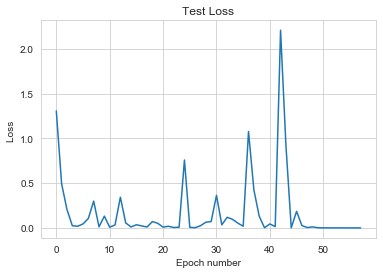

In [30]:
plt.title('Test Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss ')
plt.plot(Test_loss)


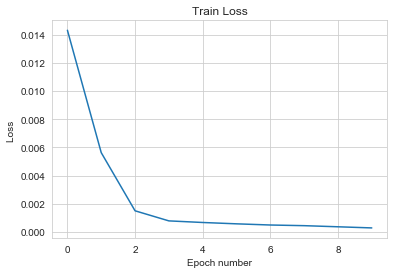

In [31]:
plt.title('Train Loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss ')
plt.plot(Train_loss)

In [32]:
def submit_epoch(model,data):
    with torch.no_grad():
        #print(1)
        results = []
        model.eval()
        model.to(device)
        
        for batch_idx, data in enumerate(data):
          
            data = data.to(device)
            outputs = model(data)
            print (outputs)
            

In [35]:
X = df_train.sample(n=10000)

X.describe()

newset = create_set2(100,X,target_columns)
submit_epoch(best_model,newset)


RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #3 'mat2' in call to _th_addmm_out